In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_ddp={}
for i in [1,2,4,8]:
    data_ddp[i] = pd.read_csv("wrappers/resnet18_forward_stats_DDP_GPU%s.csv"%(str(i)))
    
data_ddp_maxb={}
for i in [1,2,4,8]:
    data_ddp_maxb[i] = pd.read_csv("wrappers/resnet18_forward_stats_DDP_maxb_GPU%s.csv"%(str(i)))
        
data_ff={}
for i in [1,2,4,8]:
    data_ff[i] = pd.read_csv("wrappers/resnet18_forward_stats_GPU_%s_FF.csv"%(str(i)))
    data_ff[i].columns = ['throughput']

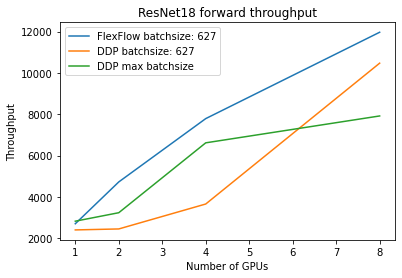

In [4]:
mean_ff = [data_ff[i]['throughput'].mean() for i in data_ff.keys()]
mean_ddp = [data_ddp[i]['throughput'].mean() for i in data_ddp.keys()]
mean_ddp_maxb = [data_ddp_maxb[i]['throughput'].mean() for i in data_ddp.keys()]
ngpu = data_ff.keys()
plt.plot(ngpu,mean_ff,label="FlexFlow batchsize: 627")
plt.plot(ngpu,mean_ddp,label="DDP batchsize: 627")
plt.plot(ngpu,mean_ddp_maxb,label="DDP max batchsize")
plt.xlabel("Number of GPUs")
plt.ylabel("Throughput")
plt.title("ResNet18 forward throughput")
plt.legend()